# Comparativo de Libros de Mahatma Gandhi

## Obtención y Preparación de los Datos

In [45]:
import gutenbergpy.textget
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
def obtener_libro(id):
    raw_book = gutenbergpy.textget.get_text_by_id(id) # with headers
    clean_book = gutenbergpy.textget.strip_headers(raw_book) # without headers
    return clean_book, raw_book

In [112]:
libro_Health, libro = obtener_libro(40373)

In [113]:
libro_Battle, libro = obtener_libro(10366)

In [114]:
libro_Health[:1000]

b"\r\n   A GUIDE TO HEALTH\r\n\r\n   BY\r\n\r\n   MAHATMA GANDHI\r\n\r\n   _Translated from the Hindi_\r\n\r\n   BY\r\n\r\n   A. RAMA IYER, M.A.\r\n\r\n   [Illustration]\r\n\r\n   1921\r\n\r\n   S. GANESAN., PUBLISHER,\r\n   TRIPLICANE ... MADRAS, S.E.\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n\r\n                                                         PAGE\r\n\r\n  TRANSLATOR'S NOTE                                       vii\r\n\r\n  INTRODUCTION                                              1\r\n\r\n  PART I: GENERAL\r\n\r\n    Chap. I. The Meaning of Health                          9\r\n\r\n    Chap. II. The Human Body                               11\r\n\r\n    Chap. III. Air                                         14\r\n\r\n    Chap. IV. Water                                        25\r\n\r\n    Chap. V. Food                                          29\r\n\r\n    Chap. VI. How much and how many times should we eat?   55\r\n\r\n    Chap. VII. Exercise                                    59\

In [115]:
libro_Battle[:1000]

b'[Transcriber\'s Note: The inconsistent spelling of the original has been\r\npreserved in this etext.]\r\n\r\nFREEDOM\'S BATTLE\r\n\r\nBEING A COMPREHENSIVE COLLECTION OF WRITINGS AND SPEECHES ON THE PRESENT\r\nSITUATION\r\n\r\nBY MAHATMA GANDHI\r\n\r\nSecond Edition\r\n\r\n1922\r\n\r\nThe Publishers express their indebtedness to the Editor and Publisher\r\nof the "Young India" for allowing the free use of the articles\r\nappeared in that journal under the name of Mahatma Gandhi, and also to\r\nMr. C. Rajagopalachar for the valuable introduction and help rendered in\r\nbringing out the book.\r\n\r\n\r\n\r\n\r\n\r\nCONTENTS\r\n\r\n\r\nI. INTRODUCTION\r\n\r\nII. THE KHILAFAT\r\n\r\n  Why I have joined the Khilafat Movement\r\n\r\n  The Turkish Treaty\r\n\r\n  Turkish Peace Terms\r\n\r\n  The Suzerainty over Arabia\r\n\r\n  Further Questions Answered\r\n\r\n  Mr. Candler\'s Open Letter\r\n\r\n  In process of keeping\r\n\r\n  Appeal to the Viceroy\r\n\r\n  The Premier\'s reply\r\n\r\n  Th

## Limpieza y Tokenización del Texto

In [116]:
# Combinar los textos para un análisis conjunto
# Decodificar si alguno de los textos es binario
if isinstance(libro_Health, bytes):
    libro_Health = libro_Health.decode('utf-8')

if isinstance(libro_Battle, bytes):
    libro_Battle = libro_Battle.decode('utf-8')

# Combinar los textos
#Libros = libro_Health + '\n' + libro_Battle

In [117]:
# Expresión regular para números romanos (del 1 al 3999: I a MMMCMXCIX)
roman_numerals_pattern = r'\bM{0,3}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})\b'

# Función para eliminar números romanos
def remove_roman_numerals(text):
    return re.sub(roman_numerals_pattern, '', text)

# Texto de ejemplo
text = libro_Health

# Texto procesado
libro_Health = remove_roman_numerals(text)

#print("Texto original:", text)
print("Texto sin números romanos:", libro_Health)


Texto sin números romanos: 
   A GUIDE TO HEALTH

   BY

   MAHATMA GANDHI

   _Translated from the Hindi_

   BY

   A. RAMA IYER, .A.

   [Illustration]

   1921

   S. GANESAN., PUBLISHER,
   TRIPLICANE ... MADRAS, S.E.




CONTENTS


                                                         PAGE

  TRANSLATOR'S NOTE                                       vii

  INTRODUCTION                                              1

  PART : GENERAL

    Chap. . The Meaning of Health                          9

    Chap. . The Human Body                               11

    Chap. . Air                                         14

    Chap. . Water                                        25

    Chap. . Food                                          29

    Chap. . How much and how many times should we eat?   55

    Chap. . Exercise                                    59

    Chap. . Dress                                      64

    Chap. . Sexual Relations                             69

  PART :

In [118]:

# Texto de ejemplo
text = libro_Battle

# Texto procesado
libro_Battle = remove_roman_numerals(text)
print("Texto sin números romanos:", libro_Health)

Texto sin números romanos: 
   A GUIDE TO HEALTH

   BY

   MAHATMA GANDHI

   _Translated from the Hindi_

   BY

   A. RAMA IYER, .A.

   [Illustration]

   1921

   S. GANESAN., PUBLISHER,
   TRIPLICANE ... MADRAS, S.E.




CONTENTS


                                                         PAGE

  TRANSLATOR'S NOTE                                       vii

  INTRODUCTION                                              1

  PART : GENERAL

    Chap. . The Meaning of Health                          9

    Chap. . The Human Body                               11

    Chap. . Air                                         14

    Chap. . Water                                        25

    Chap. . Food                                          29

    Chap. . How much and how many times should we eat?   55

    Chap. . Exercise                                    59

    Chap. . Dress                                      64

    Chap. . Sexual Relations                             69

  PART :

In [119]:

# Eliminar caracteres especiales, números y convertir a minúsculas
libro_Health_limpio = re.sub(r'[^\w\s]', '', libro_Health.lower()).replace('_', '')
libro_Health_limpio = re.sub(r'\d+', '', libro_Health_limpio)

libro_Battle_limpio = re.sub(r'[^\w\s]', '', libro_Battle.lower()).replace('_', '')
libro_Battle_limpio = re.sub(r'\d+', '', libro_Battle_limpio)

#Crear tokens por palabras
palabras_Health = word_tokenize(libro_Health_limpio)
palabras_Battle = word_tokenize(libro_Battle_limpio)

## Eliminación de Palabras Vacías (Stopwords)

In [120]:
# Obtener lista de stopwords en inglés
stop_words = set(stopwords.words('english'))

# Palabras adicionales que deseas agregar
custom_stopwords = {"chap", "etc","and","rs","k","e","mr", "would", "want"}

# Agregar las palabras personalizadas a las stopwords
stop_words.update(custom_stopwords)

# Filtrar las palabras
palabras_Health_filtradas = [word for word in palabras_Health if word not in stop_words]
palabras_Battle_filtradas = [word for word in palabras_Battle if word not in stop_words]

print(palabras_Health_filtradas)

['guide', 'health', 'mahatma', 'gandhi', 'translated', 'hindi', 'rama', 'iyer', 'illustration', 'ganesan', 'publisher', 'triplicane', 'madras', 'se', 'contents', 'page', 'translators', 'note', 'vii', 'introduction', 'part', 'general', 'meaning', 'health', 'human', 'body', 'air', 'water', 'food', 'much', 'many', 'times', 'eat', 'exercise', 'dress', 'sexual', 'relations', 'part', 'simple', 'treatments', 'air', 'treatment', 'water', 'cure', 'use', 'earth', 'fever', 'cures', 'constipation', 'dysentery', 'contagious', 'diseases', 'smallpox', 'contagious', 'diseases', 'maternity', 'childbirth', 'care', 'child', 'accidentsdrowning', 'burns', 'scalds', 'snake', 'bite', 'scorpionsting', 'conclusion', 'translators', 'note', 'days', 'name', 'mahatma', 'gandhi', 'identified', 'momentous', 'question', 'noncooperation', 'may', 'come', 'shock', 'surprise', 'readers', 'told', 'something', 'authority', 'matters', 'health', 'disease', 'well', 'us', 'perhaps', 'aware', 'author', 'quite', 'original', 'lit

## Análisis Estadístico Descriptivo

In [121]:
num_palabras_Health = len(palabras_Health_filtradas)
num_palabras_Health_unicas = len(set(palabras_Health_filtradas))
longitud_Health_promedio = sum(len(word) for word in palabras_Health_filtradas) / num_palabras_Health

print(f"Total de palabras Health: {num_palabras_Health}")
print(f"Palabras únicas Health: {num_palabras_Health_unicas}")
print(f"Longitud promedio de palabras Health: {longitud_Health_promedio:.2f}")

Total de palabras Health: 16100
Palabras únicas Health: 3987
Longitud promedio de palabras Health: 6.03


In [122]:
num_palabras_Battle = len(palabras_Battle_filtradas)
num_palabras_unicas_Battle = len(set(palabras_Battle_filtradas))
longitud_Battle_promedio = sum(len(word) for word in palabras_Battle_filtradas) / num_palabras_Battle

print(f"Total de palabras Battle: {num_palabras_Battle}")
print(f"Palabras únicas Battle: {num_palabras_unicas_Battle}")
print(f"Longitud promedio de palabras Battle: {longitud_Battle_promedio:.2f}")

Total de palabras Battle: 35566
Palabras únicas Battle: 6881
Longitud promedio de palabras Battle: 6.79


## Frecuencia de Palabras y Distribución

In [123]:
from collections import Counter
import matplotlib.pyplot as plt

# Contar frecuencias de palabras
frecuencias_Health = Counter(palabras_Health_filtradas)

# Obtener las 20 palabras más comunes
palabras_Health_comunes = frecuencias_Health.most_common(25)
palabras_Health, conteos = zip(*palabras_Health_comunes)

# Mostrar las palabras y sus conteos
print("Palabras más comunes:")
for palabra, conteo in palabras_Health_comunes:
    print(f"{palabra}: {conteo}")


Palabras más comunes:
water: 140
air: 138
even: 132
body: 125
may: 116
man: 103
also: 95
food: 94
well: 90
health: 84
us: 78
people: 70
many: 67
much: 61
take: 61
diseases: 59
one: 59
men: 58
like: 56
use: 53
disease: 51
matter: 50
best: 47
patient: 47
eat: 46


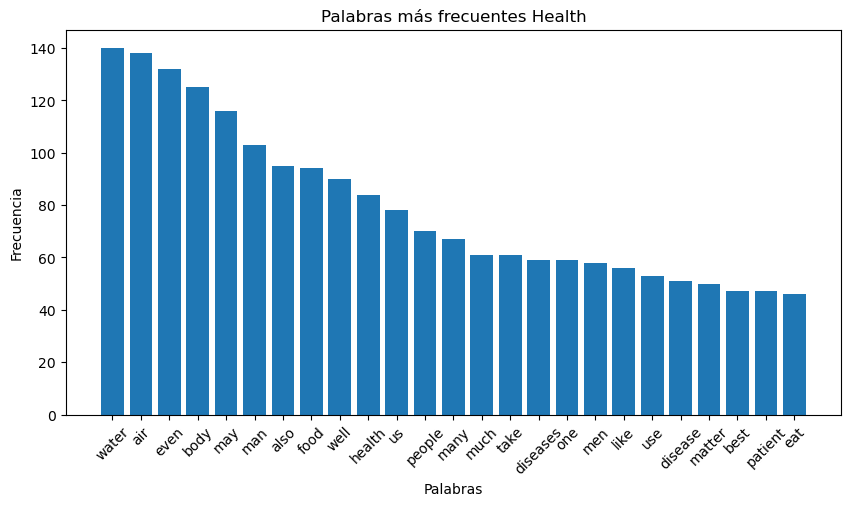

In [124]:
# Graficar las palabras más frecuentes
plt.figure(figsize=(10, 5))
plt.bar(palabras_Health, conteos)
plt.xticks(rotation=45)
plt.title('Palabras más frecuentes Health')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

In [125]:
from collections import Counter
import matplotlib.pyplot as plt

# Contar frecuencias de palabras
frecuencias_Battle = Counter(palabras_Battle_filtradas)

# Obtener las 20 palabras más comunes
palabras_Battle_comunes = frecuencias_Battle.most_common(20)
palabras_Battle, conteos = zip(*palabras_Battle_comunes)

# Mostrar las palabras y sus conteos
print("Palabras más comunes:")
for palabra, conteo in palabras_Battle_comunes:
    print(f"{palabra}: {conteo}")


Palabras más comunes:
india: 426
government: 377
noncooperation: 321
people: 220
must: 193
one: 181
british: 176
may: 153
even: 149
us: 141
indian: 132
therefore: 129
nation: 127
violence: 120
upon: 106
khilafat: 103
every: 102
country: 93
could: 92
hindus: 89


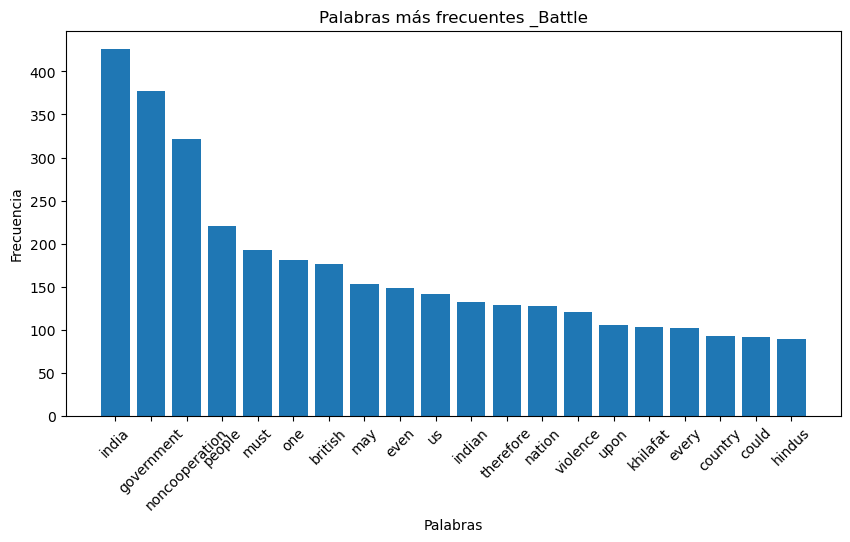

In [126]:

# Graficar las palabras más frecuentes
plt.figure(figsize=(10, 5))
plt.bar(palabras_Battle, conteos)
plt.xticks(rotation=45)
plt.title('Palabras más frecuentes _Battle')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

## Análisis de N-Gramas

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


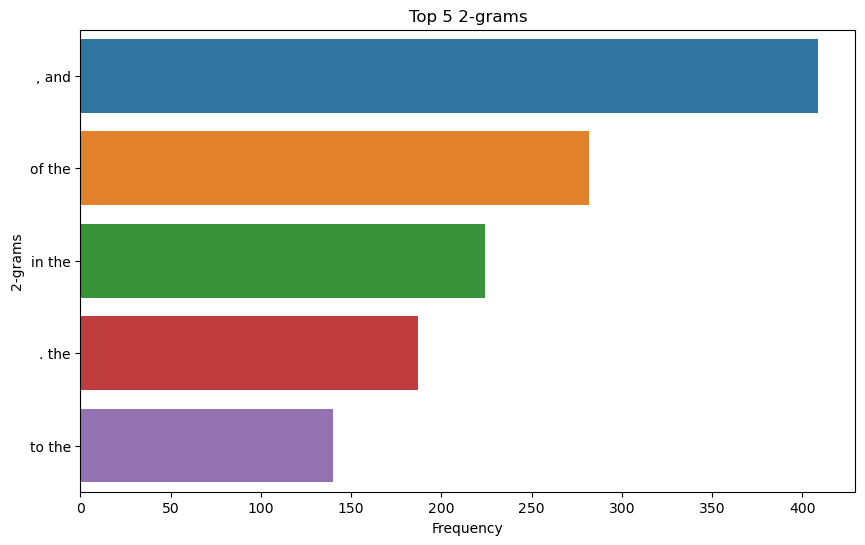

C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


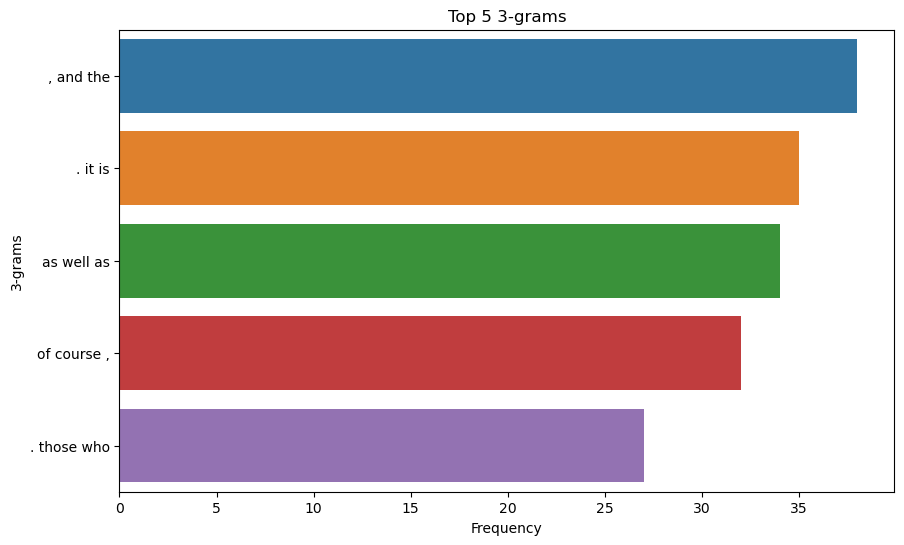

In [127]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
import seaborn as sns
import nltk

# Asegúrate de descargar los datos de NLTK si es la primera vez que lo usas.
nltk.download('punkt')

# Texto de ejemplo
text = libro_Health

# Función para graficar n-grams
def plot_ngrams(text, n=2, top_k=10):
    # Tokenizar el texto
    tokens = word_tokenize(text.lower())
    
    # Generar n-grams
    n_grams = list(ngrams(tokens, n))
    
    # Contar frecuencias
    ngram_counts = Counter(n_grams)
    
    # Seleccionar los n-grams más frecuentes
    most_common_ngrams = ngram_counts.most_common(top_k)
    
    # Separar los n-grams y sus frecuencias para graficar
    ngrams_labels = [' '.join(gram) for gram, _ in most_common_ngrams]
    frequencies = [freq for _, freq in most_common_ngrams]
    
    # Crear la gráfica
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequencies, y=ngrams_labels)
    plt.title(f'Top {top_k} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.show()

# Llamar a la función para bigrams (n=2)
plot_ngrams(text, n=2, top_k=5)

# Llamar a la función para trigrams (n=3)
plot_ngrams(text, n=3, top_k=5)


In [128]:
from nltk.util import ngrams

# Generar bigramas y trigramas
bigrams_Health = list(ngrams(palabras_Health_filtradas, 2))
trigrams_Health = list(ngrams(palabras_Health_filtradas, 3))

# Contar frecuencias de bigramas y trigramas
frecuencia_bigrams_Health = Counter(bigrams_Health)
frecuencia_trigrams_Health = Counter(trigrams_Health)


# Imprimir Bigramas más comunes con saltos de línea
print("Bigramas Health más comunes:")
for bigrams_Health, frecuencia in frecuencia_bigrams_Health.most_common(10):
    print(f"{bigrams_Health}: {frecuencia}")


# Imprimir trigramas más comunes con saltos de línea
print("Trigramas Health más comunes:")
for trigram_Health, frecuencia in frecuencia_trigrams_Health.most_common(10):
    print(f"{trigram_Health}: {frecuencia}")


Bigramas Health más comunes:
('fresh', 'air'): 18
('hot', 'water'): 17
('open', 'air'): 17
('cold', 'water'): 15
('men', 'women'): 12
('every', 'day'): 12
('olive', 'oil'): 12
('human', 'body'): 11
('laws', 'health'): 11
('many', 'people'): 11
Trigramas Health más comunes:
('tea', 'coffee', 'cocoa'): 4
('goes', 'far', 'say'): 4
('serpents', 'wild', 'beasts'): 4
('air', 'water', 'food'): 3
('observance', 'laws', 'health'): 3
('nutritious', 'elements', 'food'): 3
('even', 'lower', 'animals'): 3
('followed', 'cold', 'bath'): 3
('plenty', 'fresh', 'air'): 3
('wrapped', 'round', 'body'): 3


In [129]:
from nltk.util import ngrams

# Generar bigramas y trigramas
bigrams_Battle= list(ngrams(palabras_Battle_filtradas, 2))
trigrams_Battle = list(ngrams(palabras_Battle_filtradas, 3))

# Contar frecuencias de bigramas y trigramas
frecuencia_bigrams_Battle = Counter(bigrams_Battle)
frecuencia_trigrams_Battle = Counter(trigrams_Battle)


# Imprimir Bigramas más comunes con saltos de línea
print("Bigramas Battle más comunes:")
for bigrams_Battle, frecuencia in frecuencia_bigrams_Battle.most_common(10):
    print(f"{bigrams_Battle}: {frecuencia}")


# Imprimir trigramas más comunes con saltos de línea
print("Trigramas Health más comunes:")
for trigram_Battle, frecuencia in frecuencia_trigrams_Battle.most_common(10):
    print(f"{trigram_Battle}: {frecuencia}")


Bigramas Battle más comunes:
('government', 'india'): 41
('general', 'dyer'): 34
('people', 'india'): 27
('british', 'connection'): 21
('indian', 'mahomedans'): 20
('peace', 'terms'): 19
('hindus', 'mahomedans'): 19
('khilafat', 'question'): 16
('humble', 'opinion'): 16
('mussalmans', 'india'): 15
Trigramas Health más comunes:
('sir', 'michael', 'odwyer'): 9
('within', 'one', 'year'): 7
('lands', 'asia', 'minor'): 6
('violence', 'part', 'people'): 6
('every', 'englishman', 'india'): 5
('holy', 'places', 'islam'): 5
('rich', 'renowned', 'lands'): 5
('renowned', 'lands', 'asia'): 5
('wishes', 'people', 'india'): 5
('brother', 'shaukat', 'ali'): 5


## Análisis de Signos de Puntuación

In [130]:
# Encontrar todos los signos de puntuación en el texto original
signos_Health = re.findall(r'[^\w\s]', libro_Health)

# Contar la frecuencia de cada signo de puntuación
frecuencia_signos_Health = Counter(signos_Health)

# Mostrar las frecuencias de los signos de puntuación
print("Frecuencia Health de signos  de puntuación:")
for signo_Health, frecuencia in frecuencia_signos_Health.items():
    print(f"'{signo_Health}': {frecuencia}")

Frecuencia Health de signos  de puntuación:
'.': 1551
',': 2144
'[': 5
']': 5
''': 78
':': 10
'?': 75
'-': 313
';': 156
'}': 3
'!': 49
'(': 33
')': 33
'"': 68
'%': 5
'=': 144


In [131]:
# Encontrar todos los signos de puntuación en el texto original
signos_Battle = re.findall(r'[^\w\s]', libro_Battle)

# Contar la frecuencia de cada signo de puntuación
frecuencia_signos_Battle = Counter(signos_Battle)

# Mostrar las frecuencias de los signos de puntuación
print("Frecuencia Battle de signos  de puntuación:")
for signo_Battle, frecuencia in frecuencia_signos_Battle.items():
    print(f"'{signo_Battle}': {frecuencia}")

Frecuencia Battle de signos  de puntuación:
'[': 6
''': 476
':': 56
'.': 3696
']': 6
'"': 297
',': 2528
'-': 1538
'?': 212
';': 80
'*': 45
'(': 76
')': 76
'!': 8
'/': 1


## Análisis de Emojis

In [20]:
pip install emoji

   ---------------------------------------- 0.0/586.9 kB ? eta -:--:--
   -- ------------------------------------- 30.7/586.9 kB ? eta -:--:--
   -- ------------------------------------ 41.0/586.9 kB 653.6 kB/s eta 0:00:01
   -- ------------------------------------ 41.0/586.9 kB 653.6 kB/s eta 0:00:01
   --------- ---------------------------- 153.6/586.9 kB 913.1 kB/s eta 0:00:01
   ------------------- -------------------- 286.7/586.9 kB 1.2 MB/s eta 0:00:01
   --------------------------- ------------ 399.4/586.9 kB 1.4 MB/s eta 0:00:01
   -------------------------------- ------- 481.3/586.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  583.7/586.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 586.9/586.9 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
import emoji
print(emoji.__version__)  # Esto debería imprimir la versión instalada


2.14.0


In [22]:
import emoji
from collections import Counter

# Extraer emojis del texto
emojis_encontrados_Battle = [char for char in libro_Battle if emoji.is_emoji(char)]

# Contar la frecuencia de cada emoji
frecuencia_emojis_Battle = Counter(emojis_encontrados_Battle)

# Mostrar los emojis más comunes
print("Emojis más usados Battle:")
for emj, frecuencia in frecuencia_emojis_Battle.most_common(10):
    print(f"'{emj}': {frecuencia}")


Emojis más usados Battle:


In [23]:
import emoji
from collections import Counter

# Extraer emojis del texto
emojis_encontrados_Health  = [char for char in libro_Health  if emoji.is_emoji(char)]

# Contar la frecuencia de cada emoji
frecuencia_emojis_Health  = Counter(emojis_encontrados_Health )

# Mostrar los emojis más comunes
print("Emojis más usados Health :")
for emj, frecuencia in frecuencia_emojis_Health .most_common(10):
    print(f"'{emj}': {frecuencia}")


Emojis más usados Health :
